# Modèles et données
---

<div style="text-align: center;">
    <img src="./img/_4c492367-b76e-4fc2-b295-5a1cd0fad49b.jpeg" alt="Drawing" style="width: 500px;"/>
</div>

## Mise en contexte

Un principe fondamental de la science empirique consiste à apposer un modèle $M$ sur un ensemble de données $D$. Classiquement, l'ensemble de données $D$ consiste en un ensemble de données expérimentales, c'est-à-dire des valeurs mesurées, et le modèle $M$ est une fonction mathématique d'une ou plusieurs variables, comprenant un ou plusieurs paramètres. 

L'idée est de déterminer la valeur numérique de chaque paramètres du modèle $M$ qui fait en sorte que celui-ci correspond le mieux à l'ensemble de données $D$. Plus précisement, il s'agit d'appliquer une méthode d'optimisation qui minimise une certaine fonction de coût qui représente les différences entre les valeurs prédites par le modèle et les valeurs réelles des données (généralement appelées les résidus). Une méthode courante est la méthode des moindres carrés. Les paramètres du meilleur modèle seront ceux qui minimisent la somme des carrés des résidus.      

Aussi, des méthodes statistiques, impliquant notamment la matrice de covariance, permettent de calculer une incertitude associée à ces paramètres. 

Il est également possible de calculer des mesures de performance tel que le coefficient de détermination $R^2$. Plus $R^2$ est proche de 1, meilleure est l'adéquation du modèle aux données.


##  Librairie scipy et la méthode curve_fit


1. **Définition du modèle** :
   Nous définissons une fonction appelée `modele_lineaire`. Cette fonction prend deux paramètres : `x`, qui représente la variable indépendante, et `a` et `b`, qui sont les paramètres du modèle. Le modèle linéaire est représenté par l'équation \( y = ax + b \), où `y` est la variable dépendante.

2. **Générer des données factices** :
   Nous utilisons la fonction `np.random.seed(0)` pour initialiser le générateur de nombres aléatoires avec une graine fixe, garantissant la reproductibilité des résultats. Ensuite, nous générons des données factices pour `x_data` en créant un tableau de valeurs de 0 à 10 avec 50 points équidistants. Nous générons également des données factices pour `y_data` en utilisant le modèle linéaire avec `a=2` et `b=3`, puis en ajoutant un bruit gaussien avec une moyenne de 0 et un écart type de 1 pour simuler des erreurs de mesure.

3. **Réaliser l'ajustement de courbe** :
   Nous utilisons la fonction `curve_fit` de la bibliothèque Scipy pour ajuster notre modèle linéaire aux données `x_data` et `y_data`. Cette fonction retourne deux valeurs : `popt`, qui contient les paramètres optimaux du modèle, et `pcov`, qui est la matrice de covariance contenant des informations sur les incertitudes sur les paramètres ajustés.

4. **Paramètres ajustés** :
   Nous extrayons les paramètres ajustés `a_fit` et `b_fit` à partir de `popt`. Ces valeurs représentent les paramètres optimaux du modèle qui ont été trouvés par l'ajustement du modèle aux données.

5. **Calcul des incertitudes sur les paramètres ajustés** :
   Nous calculons les incertitudes sur les paramètres ajustés `a_fit` et `b_fit` à partir de la matrice de covariance `pcov`. Pour ce faire, nous extrayons les écarts types des paramètres de la diagonale de la matrice de covariance en utilisant la fonction `np.sqrt(np.diag(pcov))`.

6. **Prédiction du modèle** :
   Nous utilisons les paramètres ajustés `a_fit` et `b_fit` pour prédire les valeurs de `y` en utilisant notre modèle linéaire. Les valeurs prédites sont stockées dans `y_pred`.

## Exemple 1: Modèle linéaire

Paramètres ajustés: a=1.8588377490180146, b=3.8463705267266937
Incertitude sur a: 0.05126077501303976
Incertitude sur b: 0.2974603624158827
Coef. de détermination R²: 0.9647825387004532


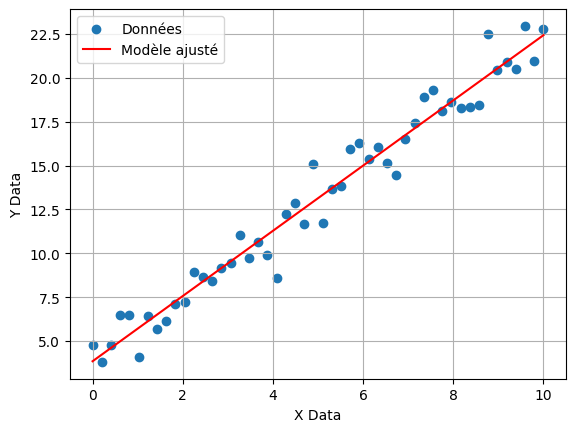

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -------------------------------------------------------------------------------------------
# Définition du modèle: 
def modele_lineaire(x, a, b):
    """
    Modèle linéaire : y = ax + b
    variable indépendante: 
        x
    variable 
    """
    return a * x + b

# Générer des données factices
np.random.seed(0)
x_data = np.linspace(0, 10, 50)
y_data = 2 * x_data + 3 + np.random.normal(scale=1.0, size=x_data.size)  # Ajout de bruit gaussien


# Réaliser l'ajustement de courbe
popt, pcov = curve_fit(modele_lineaire, x_data, y_data)

# Paramètres ajustés
a_fit, b_fit = popt
# Calcul des incertitudes sur les paramètres ajustés
a_uncertainty, b_uncertainty = np.sqrt(np.diag(pcov))

# Prédiction du modèle
y_pred = modele_lineaire(x_data, a_fit, b_fit)

# Calcul du coefficient de détermination
y_mean = np.mean(y_data)
r_squared = 1 - np.sum((y_data - y_pred)**2) / np.sum((y_data - y_mean)**2)


# Affichage des résultats
print(f"Paramètres ajustés: a={a_fit}, b={b_fit}")
print(f"Incertitude sur a: {a_uncertainty}")
print(f"Incertitude sur b: {b_uncertainty}")
print(f"Coef. de détermination R²: {r_squared}")

# Visualisation des données et de l'ajustement
plt.scatter(x_data, y_data, label='Données')
plt.plot(x_data, modele_lineaire(x_data, a_fit, b_fit), color='red', label='Modèle ajusté')
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.legend()
plt.grid(True)
plt.show()


Paramètres ajustés: a=1.2461722211949269, b=7.605422454147526
Incertitude sur a: 0.25087189571794444
Incertitude sur b: 1.4643795661010277
Coef. de détermination R²: 0.339522675173196


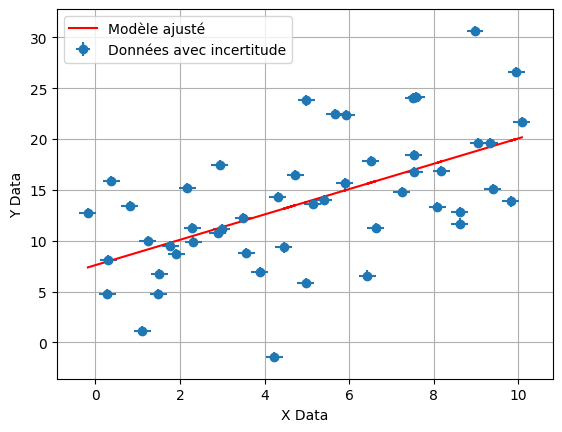

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Définition du modèle linéaire
def modele_lineaire(x, a, b):
    """
    Modèle linéaire : y = ax + b
    """
    return a * x + b

# Générer des données factices avec incertitudes
np.random.seed(0)
x_data = np.linspace(0, 10, 50)
y_data = 2 * x_data + 3 + np.random.normal(scale=5, size=x_data.size)  # Ajout de bruit gaussien pour y_data

# Générer des incertitudes pour x_data et y_data
incertitude_x = 0.2  # Incertitude sur x_data
incertitude_y = 0.5  # Incertitude sur y_data
x_data += np.random.normal(scale=incertitude_x, size=x_data.size)
y_data += np.random.normal(scale=incertitude_y, size=y_data.size)

# Réaliser l'ajustement de courbe
popt, pcov = curve_fit(modele_lineaire, x_data, y_data)

# Paramètres ajustés
a_fit, b_fit = popt

# Affichage des résultats
print(f"Paramètres ajustés: a={a_fit}, b={b_fit}")

# Calcul des incertitudes sur les paramètres ajustés
a_uncertainty, b_uncertainty = np.sqrt(np.diag(pcov))

# Prédiction du modèle
y_pred = modele_lineaire(x_data, a_fit, b_fit)

# Calcul du coefficient de détermination
y_mean = np.mean(y_data)
r_squared = 1 - np.sum((y_data - y_pred)**2) / np.sum((y_data - y_mean)**2)

print(f"Incertitude sur a: {a_uncertainty}")
print(f"Incertitude sur b: {b_uncertainty}")
print(f"Coef. de détermination R²: {r_squared}")

# Visualisation des données et de l'ajustement
plt.errorbar(x_data, y_data, xerr=incertitude_x, yerr=incertitude_y, fmt='o', label='Données avec incertitude')
plt.plot(x_data, modele_lineaire(x_data, a_fit, b_fit), color='red', label='Modèle ajusté')
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.legend()
plt.grid(True)
plt.show()

Paramètres calculés: a=1.8588377490180146, b=3.8463705267266937


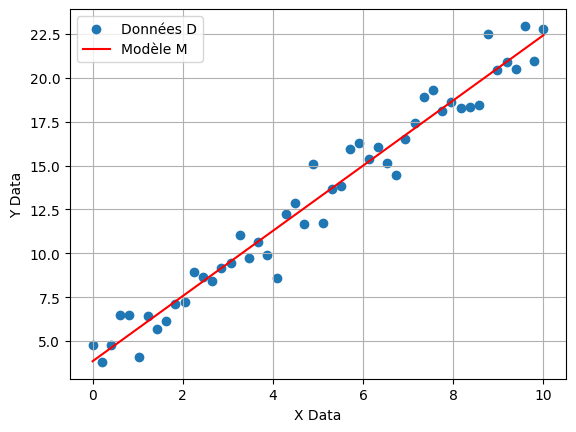

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Définition du modèle linéaire
def modele_lineaire(x, a, b):
    """
    Modèle linéaire : y = ax + b
    """
    return a * x + b

# Générer des données factices
np.random.seed(0)
x_data = np.linspace(0, 10, 50)
y_data = 2 * x_data + 3 + np.random.normal(scale=1.0, size=x_data.size)  # Ajout de bruit gaussien

# Réaliser l'ajustement de courbe
popt, pcov = curve_fit(modele_lineaire, x_data, y_data)

# Paramètres ajustés
a_fit, b_fit = popt

# Affichage des résultats
print(f"Paramètres calculés: a={a_fit}, b={b_fit}")

# Visualisation des données et de l'ajustement
plt.scatter(x_data, y_data, label='Données D')
plt.plot(x_data, modele_lineaire(x_data, a_fit, b_fit), color='red', label='Modèle M')
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.legend()
plt.grid(True)
plt.show()


Paramètres ajustés: a=2.3904937602698193, b=-0.1428821253908905, c=0.13790361168229004
Incertitudes sur les paramètres: a=0.01814108310160014, b=0.23399055709619296, c=0.6376439545359767


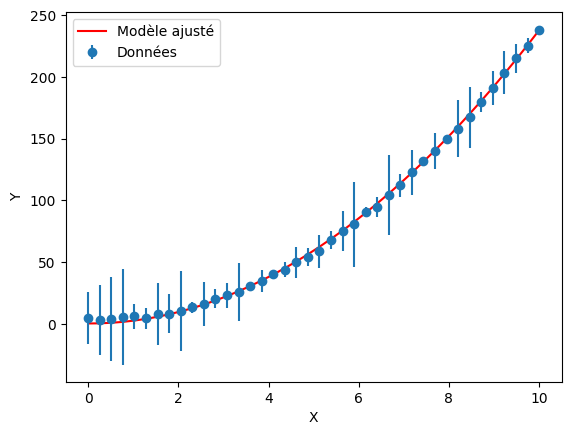

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def modele_M(x, a, b, c):
    return a * x**2 + b * x + c

# Générer des données factices
np.random.seed(0)
x_data = np.linspace(0, 10, 40)
y_data = 2.5 * x_data**2 - 1.5 * x_data + 3 + np.random.normal(size=x_data.size)
# Ajouter des incertitudes sur les données
uncertainty = np.abs(np.random.normal(scale=20, size=x_data.size))

# Réaliser l'ajustement de courbe
popt, pcov = curve_fit(modele_M, x_data, y_data, sigma=uncertainty)

# Paramètres ajustés
a_fit, b_fit, c_fit = popt

# Incertitudes sur les paramètres
a_uncertainty = np.sqrt(pcov[0, 0])
b_uncertainty = np.sqrt(pcov[1, 1])
c_uncertainty = np.sqrt(pcov[2, 2])

# Affichage des résultats
print(f"Paramètres ajustés: a={a_fit}, b={b_fit}, c={c_fit}")
print(f"Incertitudes sur les paramètres: a={a_uncertainty}, b={b_uncertainty}, c={c_uncertainty}")

# print(uncertainty)
# Visualisation des données et de l'ajustement
plt.plot(x_data, modele_M(x_data, *popt), 'r-', label='Modèle ajusté')
plt.errorbar(x_data, y_data, yerr=uncertainty, fmt='o', label='Données')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Paramètres ajustés: A=4.7277682605640905, omega=2.0027307499175366, gamma=0.19826682889546587, phi=0.7845555630172037
Incertitudes sur les paramètres: A=0.011991769622067454, omega=0.00094044868866963, gamma=0.0014223412651209158, phi=0.001472170894839975


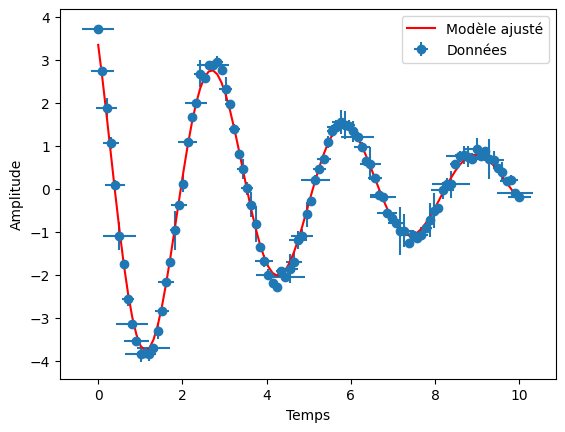

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -------------------------------------------------------------------------------------------
def modele_oscillation_amortie(t, A_0, omega, gamma, phi):
    """
    Modèle d'oscillation amortie :  x(t) = A_0 * exp(-gamma/2 * t) * cos(omega * t + phi) 
        Variable indépendante:
            t : temps
        Variable dépendante:
            x : position
        Paramètres:
            A_0 : amplitude initiale
            omega : fréquence angulaire
            gamma : taux d'amortissement
            phi : phase initiale
    """
    return A_0 * np.exp(-gamma/2 * t) * np.cos(omega * t + phi)

# -------------------------------------------------------------------------------------------
# Générer des données factices pour l'oscillation amortie
# -------------------------------------------------------------------------------------------
A_0_true = 5.0
omega_true = 2.0
gamma_true = 0.2
phi_true = np.pi / 4
np.random.seed(0)
t_data = np.linspace(0, 10, 100)
y_data = modele_oscillation_amortie(t_data, A_0_true, omega_true, gamma_true, phi_true) + np.random.normal(scale=0.1, size=t_data.size)

# Générer des incertitudes pour les données temporelles
uncertainty_t = np.abs(np.random.normal(scale=.2, size=t_data.size))  # Incertitude de 0.05 unités de temps

# Générer des incertitudes pour les données d'amplitude
uncertainty_y = np.abs(np.random.normal(scale=.2, size=y_data.size))  # Incertitude de 0.1 sur les données d'amplitude


# -------------------------------------------------------------------------------------------
# Réaliser l'ajustement de courbe en tenant compte des incertitudes sur les données d'amplitude et de temps
popt, pcov = curve_fit(modele_oscillation_amortie, t_data, y_data, sigma=uncertainty_y, absolute_sigma=True, p0=[A_true, omega_true, gamma_true, phi_true])

# Paramètres ajustés
A_fit, omega_fit, gamma_fit, phi_fit = popt

# Incertitudes sur les paramètres
A_uncertainty, omega_uncertainty, gamma_uncertainty, phi_uncertainty = np.sqrt(np.diag(pcov))

# -------------------------------------------------------------------------------------------
# Affichage des résultats
print(f"Paramètres ajustés: A={A_fit}, omega={omega_fit}, gamma={gamma_fit}, phi={phi_fit}")
print(f"Incertitudes sur les paramètres: A={A_uncertainty}, omega={omega_uncertainty}, gamma={gamma_uncertainty}, phi={phi_uncertainty}")

# -------------------------------------------------------------------------------------------
# Visualisation des données et de l'ajustement
plt.errorbar(t_data, y_data, yerr=uncertainty_y, xerr=uncertainty_t, fmt='o', label='Données')
plt.plot(t_data, modele_oscillation_amortie(t_data, *popt), 'r-', label='Modèle ajusté')
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.legend()
plt.show()



Paramètres ajustés: Ae=1.0353874631017435, omega0=9.40090635368244, Q=1.9843261251850683
Incertitudes sur les paramètres: Ae=0.0066915777693171636, omega0=0.24022301329427712, Q=0.0031355262007398935


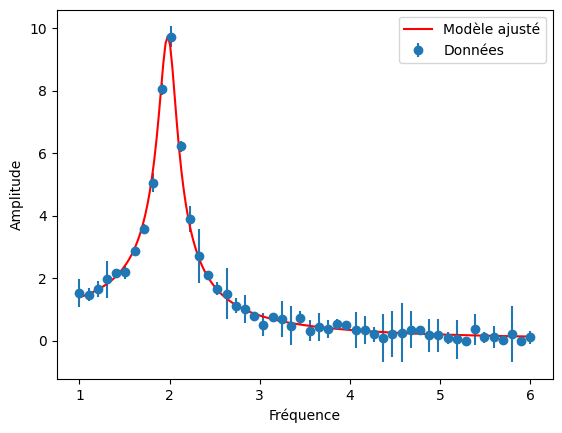

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def Afct(omega, Ae, Q, omega0):
    """
    Modèle d'amplitude en fonction de la fréquence :
    Ae : amplitude de l'oscillateur non forcé
    Q : facteur de qualité
    omega0 : fréquence propre
    omega : fréquence du forçage
    """
    return Ae * (omega0 / omega) / (np.sqrt((omega0 / omega - omega / omega0)**2 + 1 / Q**2))

# Générer des données factices pour l'amplitude en fonction de la fréquence
np.random.seed(0)
omega_data = np.linspace(1, 6, 50)
Ae_true = 1.0
omega0_true = 2.0
Q_true = 10
amplitude_data = Afct(omega_data, Ae_true, Q_true, omega0_true) + np.random.normal(scale=0.1, size=omega_data.size)

# Ajouter des incertitudes sur les données d'amplitude
uncertainty_amplitude = np.abs(np.random.normal(scale=.5, size=omega_data.size))

# Réaliser l'ajustement de courbe
popt, pcov = curve_fit(Afct, omega_data, amplitude_data, sigma=uncertainty_amplitude, absolute_sigma=True, p0=[Ae_true, Q_true, omega0_true])

# Paramètres ajustés
Ae_fit, omega0_fit, Q_fit = popt

# Incertitudes sur les paramètres
Ae_uncertainty, omega0_uncertainty, Q_uncertainty = np.sqrt(np.diag(pcov))

# Affichage des résultats
print(f"Paramètres ajustés: Ae={Ae_fit}, omega0={omega0_fit}, Q={Q_fit}")
print(f"Incertitudes sur les paramètres: Ae={Ae_uncertainty}, omega0={omega0_uncertainty}, Q={Q_uncertainty}")


omega_data_fit = np.linspace(1, 6, 200)

# Visualisation des données et de l'ajustement
plt.errorbar(omega_data, amplitude_data, yerr=uncertainty_amplitude, fmt='o', label='Données')
plt.plot(omega_data_fit, Afct(omega_data_fit, *popt), 'r-', label='Modèle ajusté')
plt.xlabel('Fréquence')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


Paramètres ajustés: Veq=7029.230681686166, pKa=-7000.211092413715, pH_init=1.8367502752932334, pH_fin=11.999637510211297
Incertitudes sur les paramètres: Veq=31327.31964111632, pKa=31327.321147729926, pH_init=0.011925670599693688, pH_fin=0.005787100663755172


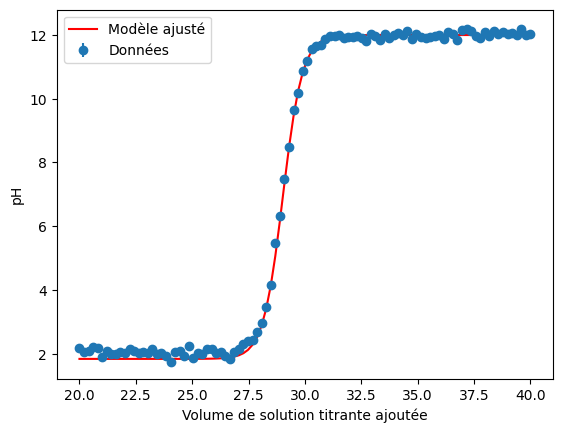

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Définition du modèle de titrage (par exemple, une courbe sigmoïde)
def modele_titrage(volume, Veq, pKa, pH_init, pH_fin):
    """
    Modèle de titrage :
    volume : volume de solution titrante ajoutée
    Veq : volume équivalent
    pKa : pKa de l'acide/base titrée
    pH_init : pH initial
    pH_fin : pH final
    """
    return pH_init + (pH_fin - pH_init) / (1 + 10**(pKa - volume + Veq))

# Générer des données factices pour un titrage
np.random.seed(0)
volume_data = np.linspace(20, 40, 100)
Veq_true = 25.0
pKa_true = 4.0
pH_init_true = 2.0
pH_fin_true = 12.0
pH_data = modele_titrage(volume_data, Veq_true, pKa_true, pH_init_true, pH_fin_true) + np.random.normal(scale=0.1, size=volume_data.size)

# Ajouter des incertitudes sur les données de pH
uncertainty_pH = np.abs(np.random.normal(scale=0.05, size=volume_data.size))

# Réaliser l'ajustement de courbe
popt, pcov = curve_fit(modele_titrage, volume_data, pH_data, sigma=uncertainty_pH, p0=[Veq_true, pKa_true, pH_init_true, pH_fin_true])

# Paramètres ajustés
Veq_fit, pKa_fit, pH_init_fit, pH_fin_fit = popt

# Incertitudes sur les paramètres
Veq_uncertainty, pKa_uncertainty, pH_init_uncertainty, pH_fin_uncertainty = np.sqrt(np.diag(pcov))

# Affichage des résultats
print(f"Paramètres ajustés: Veq={Veq_fit}, pKa={pKa_fit}, pH_init={pH_init_fit}, pH_fin={pH_fin_fit}")
print(f"Incertitudes sur les paramètres: Veq={Veq_uncertainty}, pKa={pKa_uncertainty}, pH_init={pH_init_uncertainty}, pH_fin={pH_fin_uncertainty}")

# Visualisation des données et de l'ajustement
plt.errorbar(volume_data, pH_data, yerr=uncertainty_pH, fmt='o', label='Données')
plt.plot(volume_data, modele_titrage(volume_data, *popt), 'r-', label='Modèle ajusté')
plt.xlabel('Volume de solution titrante ajoutée')
plt.ylabel('pH')
plt.legend()
plt.show()


Paramètres ajustés: I0=5.225144999830461, tau=1.7763725532051236
Incertitudes sur les paramètres: I0=0.13891296434701497, tau=0.029361033565941583


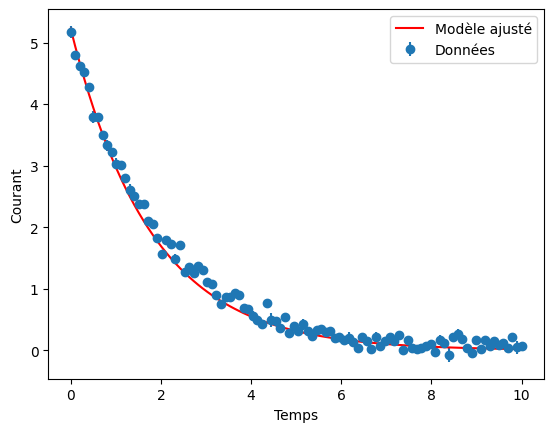

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Définition du modèle pour le courant dans la bobine d'induction
def modele_courant(t, I0, tau):
    """
    Modèle de courant dans la bobine d'induction :
    t : temps
    I0 : courant initial
    tau : constante de temps
    """
    return I0 * np.exp(-t / tau)

# Générer des données factices pour le courant dans la bobine d'induction
np.random.seed(0)
t_data = np.linspace(0, 10, 100)
I0_true = 5.0
tau_true = 2.0
courant_data = modele_courant(t_data, I0_true, tau_true) + np.random.normal(scale=0.1, size=t_data.size)

# Ajouter des incertitudes sur les données de courant
uncertainty_courant = np.abs(np.random.normal(scale=0.05, size=t_data.size))

# Réaliser l'ajustement de courbe
popt, pcov = curve_fit(modele_courant, t_data, courant_data, sigma=uncertainty_courant, p0=[I0_true, tau_true])

# Paramètres ajustés
I0_fit, tau_fit = popt

# Incertitudes sur les paramètres
I0_uncertainty, tau_uncertainty = np.sqrt(np.diag(pcov))

# Affichage des résultats
print(f"Paramètres ajustés: I0={I0_fit}, tau={tau_fit}")
print(f"Incertitudes sur les paramètres: I0={I0_uncertainty}, tau={tau_uncertainty}")

# Visualisation des données et de l'ajustement
plt.errorbar(t_data, courant_data, yerr=uncertainty_courant, fmt='o', label='Données')
plt.plot(t_data, modele_courant(t_data, *popt), 'r-', label='Modèle ajusté')
plt.xlabel('Temps')
plt.ylabel('Courant')
plt.legend()
plt.show()


Paramètres ajustés: I0=5.055788838156496, tau=2.26784256369392
Incertitudes sur les paramètres: I0=0.008295736511141346, tau=0.01887354388822267


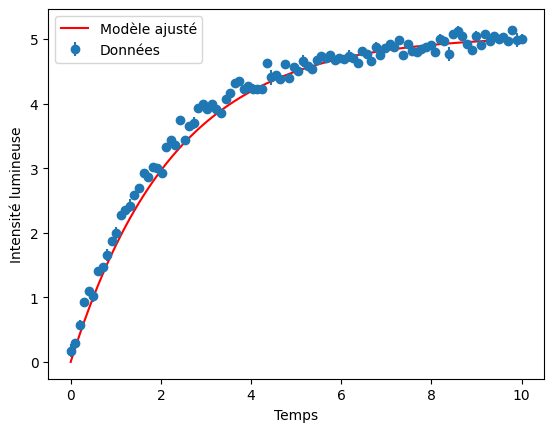

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Définition du modèle pour l'allumage de la bobine
def modele_allumage(t, I0, tau):
    """
    Modèle d'allumage de la bobine :
    t : temps
    I0 : intensité lumineuse initiale
    tau : constante de temps
    """
    return I0 * (1 - np.exp(-t / tau))

# Générer des données factices pour l'allumage de la bobine
np.random.seed(0)
t_data = np.linspace(0, 10, 100)
I0_true = 5.0
tau_true = 2.0
intensite_data = modele_allumage(t_data, I0_true, tau_true) + np.random.normal(scale=0.1, size=t_data.size)

# Ajouter des incertitudes sur les données d'intensité lumineuse
uncertainty_intensite = np.abs(np.random.normal(scale=0.05, size=t_data.size))

# Réaliser l'ajustement de courbe
popt, pcov = curve_fit(modele_allumage, t_data, intensite_data, sigma=uncertainty_intensite, p0=[I0_true, tau_true])

# Paramètres ajustés
I0_fit, tau_fit = popt

# Incertitudes sur les paramètres
I0_uncertainty, tau_uncertainty = np.sqrt(np.diag(pcov))

# Affichage des résultats
print(f"Paramètres ajustés: I0={I0_fit}, tau={tau_fit}")
print(f"Incertitudes sur les paramètres: I0={I0_uncertainty}, tau={tau_uncertainty}")

# Visualisation des données et de l'ajustement
plt.errorbar(t_data, intensite_data, yerr=uncertainty_intensite, fmt='o', label='Données')
plt.plot(t_data, modele_allumage(t_data, *popt), 'r-', label='Modèle ajusté')
plt.xlabel('Temps')
plt.ylabel('Intensité lumineuse')
plt.legend()
plt.show()


Paramètres ajustés: a=1.989359507179269, b=-1.008288661480406, c=0.4872254727213828, d=1.1063446975607507, e=-1.8911452722957856, f=2.765278185963029


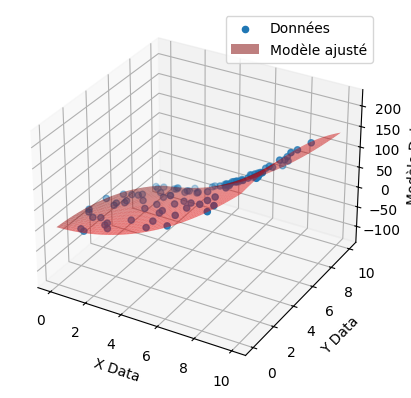

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Définition du modèle d'apprentissage machine
def modele_M(xy, a, b, c, d, e, f):
    """
    Modèle d'apprentissage machine dépendant de deux variables (x, y):
    xy : tuple contenant les variables x et y
    a, b, c, d, e, f : paramètres du modèle
    """
    x, y = xy
    return a * x**2 + b * y**2 + c * x * y + d * x + e * y + f

# Générer des données factices pour x et y
np.random.seed(0)
x_data = np.random.uniform(0, 10, 100)
y_data = np.random.uniform(0, 10, 100)

# Générer des données factices pour le modèle
a_true = 2.0
b_true = -1.0
c_true = 0.5
d_true = 1.0
e_true = -2.0
f_true = 3.0
modele_data = modele_M((x_data, y_data), a_true, b_true, c_true, d_true, e_true, f_true) + np.random.normal(scale=1.0, size=x_data.size)

# Réaliser l'ajustement de courbe
popt, pcov = curve_fit(modele_M, (x_data, y_data), modele_data)

# Paramètres ajustés
a_fit, b_fit, c_fit, d_fit, e_fit, f_fit = popt

# Affichage des résultats
print(f"Paramètres ajustés: a={a_fit}, b={b_fit}, c={c_fit}, d={d_fit}, e={e_fit}, f={f_fit}")

# Visualisation des données et de l'ajustement
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, modele_data, label='Données')
x_fit, y_fit = np.meshgrid(np.linspace(0, 10, 50), np.linspace(0, 10, 50))
modele_fit = modele_M((x_fit, y_fit), a_fit, b_fit, c_fit, d_fit, e_fit, f_fit)
ax.plot_surface(x_fit, y_fit, modele_fit, color='r', alpha=0.5, label='Modèle ajusté')
ax.set_xlabel('X Data')
ax.set_ylabel('Y Data')
ax.set_zlabel('Modèle Data')
plt.legend()
plt.show()


In [87]:
import numpy as np
import ipyvolume as ipv
from scipy.optimize import curve_fit

# Définition du modèle d'apprentissage machine
def modele_M(xy, a, b, c, d, e, f):
    """
    Modèle d'apprentissage machine dépendant de deux variables (x, y):
    xy : tuple contenant les variables x et y
    a, b, c, d, e, f : paramètres du modèle
    """
    x, y = xy
    return a * x**2 + b * y**2 + c * x * y + d * x + e * y + f

# Générer des données factices pour x et y
np.random.seed(0)
x_data = np.random.uniform(0, 10, 100)
y_data = np.random.uniform(0, 10, 100)

# Générer des données factices pour le modèle
a_true = 2.0
b_true = -1.0
c_true = 0.5
d_true = 1.0
e_true = -2.0
f_true = 3.0
modele_data = modele_M((x_data, y_data), a_true, b_true, c_true, d_true, e_true, f_true) + np.random.normal(scale=1.0, size=x_data.size)

# Réaliser l'ajustement de courbe
popt, pcov = curve_fit(modele_M, (x_data, y_data), modele_data)

# Paramètres ajustés
a_fit, b_fit, c_fit, d_fit, e_fit, f_fit = popt

# Affichage des résultats
print(f"Paramètres ajustés: a={a_fit}, b={b_fit}, c={c_fit}, d={d_fit}, e={e_fit}, f={f_fit}")

# Visualisation des données et de l'ajustement avec ipyvolume
x_fit, y_fit = np.meshgrid(np.linspace(0, 10, 50), np.linspace(0, 10, 50))
modele_fit = modele_M((x_fit, y_fit), a_fit, b_fit, c_fit, d_fit, e_fit, f_fit)
ipv.figure()
ipv.plot_surface(x_fit, y_fit, modele_fit, color='red')
ipv.scatter(x_data, y_data, modele_data, color='blue', size=2)
ipv.xlabel('X Data')
ipv.ylabel('Y Data')
ipv.zlabel('Modèle Data')
ipv.show()



Paramètres ajustés: a=1.989359507179269, b=-1.008288661480406, c=0.4872254727213828, d=1.1063446975607507, e=-1.8911452722957856, f=2.765278185963029


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [90]:
from tabulate import tabulate

# Données des paramètres ajustés et des incertitudes
parametres = [
    ["Ae", 4.7277682605640905, 0.011991769622067454],
    ["omega", 2.0027307499175366, 0.00094044868866963],
    ["gamma", 0.19826682889546587, 0.0014223412651209158],
    ["phi", 0.7845555630172037, 0.001472170894839975]
]

# Affichage du tableau
print(tabulate(parametres, headers=["Paramètres", "Ajusté", "Incertitude"], tablefmt="fancy_grid"))


╒══════════════╤══════════╤═══════════════╕
│ Paramètres   │   Ajusté │   Incertitude │
╞══════════════╪══════════╪═══════════════╡
│ Ae           │ 4.72777  │   0.0119918   │
├──────────────┼──────────┼───────────────┤
│ omega        │ 2.00273  │   0.000940449 │
├──────────────┼──────────┼───────────────┤
│ gamma        │ 0.198267 │   0.00142234  │
├──────────────┼──────────┼───────────────┤
│ phi          │ 0.784556 │   0.00147217  │
╘══════════════╧══════════╧═══════════════╛
